In [128]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [129]:
# Usando a média dos rótulos dos 3 vizinhos mais próximos
knn = KNeighborsRegressor(n_neighbors=3)

In [130]:
# Conjunto de dados importado do skalearn
df = load_boston()

In [131]:
# importar dados separando em atributos e rótulos
X, y = load_boston(return_X_y=True)

In [132]:
X.shape

(506, 13)

In [133]:
y.shape

(506,)

In [134]:
# descrição do conjunto de dados
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [135]:
# Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [136]:
# Armazenar valores de treino
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [137]:
# Resultado da regressão após treino (n_neighbors=3)
knn.score(X_test,y_test)

0.4097636490416011

In [138]:
# Mesma regressão com quantidade diferente de neighbors (n_neighbors=5) 
knn5 = KNeighborsRegressor(n_neighbors=5)
df = load_boston()
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)
knn5.fit(X_train,y_train)
knn5.score(X_test,y_test)

0.5502887837344024

In [139]:
# Mesma regressão com quantidade diferente de neighbors (n_neighbors=7)
knn7 = KNeighborsRegressor(n_neighbors=7)
df = load_boston()
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)
knn7.fit(X_train,y_train)
knn7.score(X_test,y_test)

0.49750242240367826

In [140]:
# Mesma regressão com quantidade diferente de neighbors (n_neighbors=1) 
knn1 = KNeighborsRegressor(n_neighbors=1)
df = load_boston()
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)
knn1.fit(X_train,y_train)
knn1.score(X_test,y_test)

0.3560889661336052

In [141]:
# Uso do MinMaxScaler para mudar escala dos atributos e verificar alteração do resultado da regressão
# n_neighbors=3
from sklearn.preprocessing import MinMaxScaler

In [142]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_train

array([[7.31968244e-03, 0.00000000e+00, 7.79494911e-01, ...,
        9.14893617e-01, 1.00000000e+00, 4.61644592e-01],
       [9.90101972e-05, 7.50000000e-01, 1.05163965e-01, ...,
        9.04255319e-01, 1.00000000e+00, 3.60651214e-01],
       [1.79387981e-04, 1.75000000e-01, 6.40784018e-03, ...,
        6.38297872e-01, 9.90771093e-01, 1.74392936e-01],
       ...,
       [4.68965607e-03, 0.00000000e+00, 2.32566905e-01, ...,
        7.44680851e-01, 1.00000000e+00, 1.64735099e-01],
       [8.17378139e-04, 0.00000000e+00, 1.07048624e-01, ...,
        4.25531915e-01, 9.85803621e-01, 1.43211921e-01],
       [2.96568181e-03, 0.00000000e+00, 3.19638145e-01, ...,
        7.02127660e-01, 1.00000000e+00, 3.47682119e-01]])

In [143]:
X_test = mm.transform(X_test)
X_test

array([[7.73816373e-03, 0.00000000e+00, 1.88088956e-01, ...,
        5.10638298e-01, 9.72288063e-01, 2.04194260e-02],
       [7.91223399e-02, 0.00000000e+00, 6.36637769e-01, ...,
        8.08510638e-01, 1.00000000e+00, 2.48620309e-01],
       [1.38192667e-03, 0.00000000e+00, 2.77044855e-01, ...,
        8.82978723e-01, 9.91401483e-01, 3.10982340e-01],
       ...,
       [1.81770754e-02, 0.00000000e+00, 6.92423671e-01, ...,
        2.23404255e-01, 8.91547733e-01, 1.29690949e-01],
       [6.70358877e-04, 7.00000000e-01, 3.88239729e-02, ...,
        2.34042553e-01, 9.36154118e-01, 8.30573951e-02],
       [1.70357381e-03, 0.00000000e+00, 3.31699962e-01, ...,
        5.53191489e-01, 9.90922386e-01, 2.84492274e-01]])

In [145]:
knn.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=3)

In [146]:
knn.score(X_test,y_test)

0.6222614596092914

In [ ]:
# Aparentemente o uso do MinMaxScaler melhora o resultado 

In [152]:
knn.pred = knn.predict(X_test)

In [149]:
import matplotlib.pyplot as plt

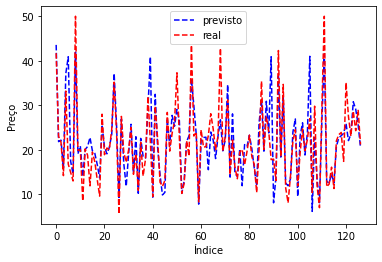

In [154]:
plt.plot(range(knn.pred.shape[0]), knn.pred,'b--')
plt.plot(range(y_test.shape[0]), y_test,'r--')
plt.legend(['previsto', 'real'])
plt.ylabel('Preço')
plt.xlabel('Índice')

plt.show()